### ISC CamCan Suspense

The goal of this notebook is to run a sliding-window ISC 

### setting up modules

In [9]:
import numpy as np
import os, sys, scipy, nilearn, warnings, brainiak
import numpy as np
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
import seaborn as sns
import pandas as pd
warnings.filterwarnings("ignore")
from brainiak import isfc
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

### set up files

In [10]:
suspense_file = '../data/avg_suspense.npy'
dict_file     = '../data/timeseries_dictionary2.npy'
ts_data_file  = '../data/ts_data.npy'

### load data 
see description in notebook on main ISC analysis

In [11]:
ts_data = np.load(ts_data_file)
n_regions, n_tr, n_subjs = ts_data.shape

### compute dynamic ISC analysis

In [4]:
winSize = 30
step = 1
numOfChunks = int((n_tr - winSize)/step ) 
print(numOfChunks)

163


In [6]:
dyn_isc_result_all = np.zeros((n_regions, numOfChunks))

# change e.g. n_subjs = 30  to speed up computation - but don't overwrite the output...
D = ts_data[:,:,:n_subjs] 
print('Calculating ISC on ', D.shape[0], ' voxels/regions and ', D.shape[2], ' subjects over ', numOfChunks, ' windows.'   )
    
slide_isc_node_seg_mean = np.zeros((n_regions,numOfChunks))
onsets = np.arange(0,numOfChunks*step, step)  
    
for curr_win in range(0,numOfChunks):    
        this_onset = onsets[curr_win]
        D_seg_data = D[:, this_onset:(this_onset+winSize), :]
        ISC = brainiak.isfc.isc(D_seg_data, collapse_subj=True)
        ISC[np.isnan(ISC)] = 0
        dyn_isc_result_all[:, curr_win] = ISC 

        progress = 100 * ( curr_win/numOfChunks)
        sys.stdout.write("\r%d%%" % progress)
        sys.stdout.flush()   

Calculating ISC on  268  voxels/regions and  496  subjects over  163  windows.
99%

In [14]:
# if precomputed
#dyn_isc_file  = '../data/dyn_isc_dict.npy'
#dyn_isc_dict = np.load(dyn_isc_file).item() 
#dyn_isc_result_all = dyn_isc_dict['dyn_isc_result_all']
#dyn_isc_result = dyn_isc_dict['dyn_isc_result_splithalf']

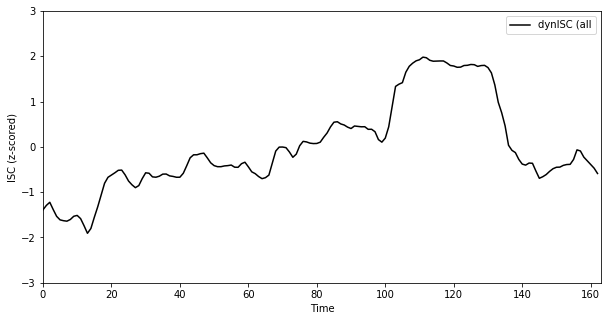

In [15]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(111)
ax1.plot(scipy.stats.zscore(np.nanmean(dyn_isc_result_all[:,:], axis = 0)), color = 'black', label = 'dynISC (all');
plt.legend();
plt.xlim(0, 163);
plt.ylim(-3, 3);
plt.xlabel('Time');
plt.ylabel('ISC (z-scored)');

#### set up two sub-samples (for consistency check)

In [8]:
subject_chunks = [[0, int(n_subjs/2)],
                  [int(n_subjs/2), n_subjs]]
n_iterations = len(subject_chunks)
dyn_isc_result = np.zeros((n_iterations, n_regions, numOfChunks))

sub_index = np.arange(n_subjs)
np.random.shuffle(sub_index)

for curr_sample in range(n_iterations): 
    print('Working on subgroup #', (curr_sample +1 ), ' of ', n_iterations)
    people_to_use = np.arange(subject_chunks[curr_sample][0], subject_chunks[curr_sample][1], 1)
    #print(people_to_use)
    #print(sub_index[people_to_use])
    
    D = ts_data[:,:,sub_index[people_to_use] ]
    print('Calculating ISC on ', D.shape[0], ' voxels/regions and ', D.shape[2], ' subjects over ', numOfChunks, ' windows.'   )
    
    slide_isc_node_seg_mean = np.zeros((n_regions,numOfChunks))
    onsets = np.arange(0,numOfChunks*step, step)  
    
    for curr_win in range(0,numOfChunks):    
        this_onset = onsets[curr_win]
        D_seg_data = D[:, this_onset:(this_onset+winSize), :]
        ISC = brainiak.isfc.isc(D_seg_data, collapse_subj=True)
        ISC[np.isnan(ISC)] = 0
        slide_isc_node_seg_mean[:, curr_win] = ISC 

        progress = 100 * ( curr_win/numOfChunks)
        sys.stdout.write("\r%d%%" % progress)
        sys.stdout.flush()

    dyn_isc_result[curr_sample, :, :] = slide_isc_node_seg_mean

Working on subgroup # 1  of  2
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

Alignment: 0.53


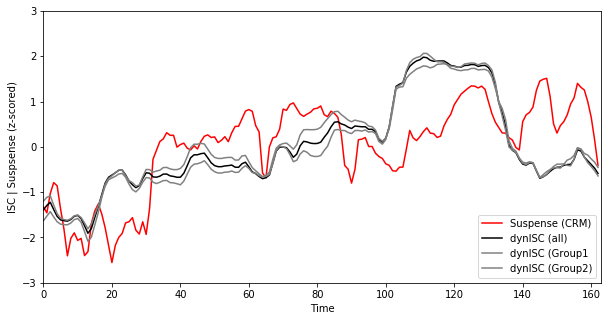

In [18]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(111)

suspense = np.load(suspense_file)
ax1.plot(scipy.stats.zscore(suspense),   color = 'red',   label = 'Suspense (CRM)' );
ax1.plot(scipy.stats.zscore(np.nanmean(dyn_isc_result_all[:,:], axis = 0)), color = 'black', label = 'dynISC (all)'   );
ax1.plot(scipy.stats.zscore(np.nanmean(dyn_isc_result[0,:,:], axis = 0)),   color = 'gray',  label = 'dynISC (Group1' );
ax1.plot(scipy.stats.zscore(np.nanmean(dyn_isc_result[1,:,:], axis = 0)),   color = 'gray',  label = 'dynISC (Group2)');

plt.legend(loc = 4)
plt.xlim(0, 163)
plt.ylim(-3, 3)
plt.xlabel('Time')
plt.ylabel('ISC | Suspsense (z-scored)')

alignment = np.corrcoef(
                (scipy.stats.zscore(np.nanmean(dyn_isc_result_all[:,:], axis =0)) ),
                 scipy.signal.resample(scipy.stats.zscore(suspense), 163) )[0,1]

print('Alignment: ' + str(np.round(alignment, 2)) )

In [24]:
#suspense_raw = '../data/suspense.npy'
#all_suspense = np.load(suspense_raw)
#all_suspense = all_suspense[:,50:2440] 
#ms = np.mean(all_suspense, axis=0)
#ms193 = scipy.signal.resample(ms, 193)

Alignment: 0.73


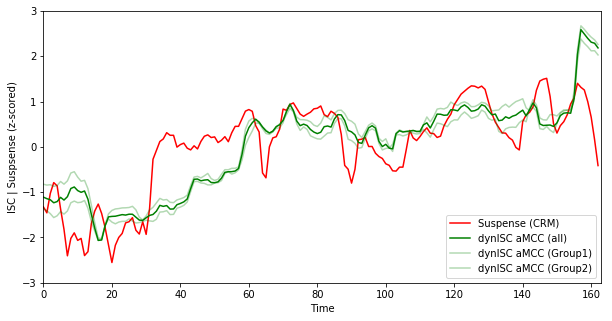

In [25]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(111)

ax1.plot(scipy.stats.zscore(suspense), color = 'red',   label = 'Suspense (CRM)');
ax1.plot(scipy.stats.zscore(dyn_isc_result_all[14,:]),             color = 'green', label = 'dynISC aMCC (all)');
ax1.plot(scipy.stats.zscore(dyn_isc_result[0,14,:]).T,             color = 'green', alpha = 0.3, label = 'dynISC aMCC (Group1)');
ax1.plot(scipy.stats.zscore(dyn_isc_result[1,14,:]).T,            color = 'green',  alpha = 0.3, label = 'dynISC aMCC (Group2)');

plt.legend(loc = 4)
plt.xlim(0, 163)
plt.ylim(-3, 3)
plt.xlabel('Time')
plt.ylabel('ISC | Suspsense (z-scored)')

alignment = np.corrcoef(
                (scipy.stats.zscore(dyn_isc_result_all[14,:]) ),
                 scipy.signal.resample(scipy.stats.zscore(suspense), 163) )[0,1]

print('Alignment: ' + str(np.round(alignment,2)) )

#### save results

because computing them every time from scratch takes a lot of time we save the output here so we can load it quicker later on

In [21]:
dyn_isc_dict = {}
dyn_isc_dict['dyn_isc_result_all'] = dyn_isc_result_all
dyn_isc_dict['dyn_isc_result_splithalf'] = dyn_isc_result

np.save('../data/dyn_isc_dict.npy', dyn_isc_dict) 